<center><h1>Graph project: Epidemic spreading</h1></center>

<center><h4>ENSEEIHT SN, notebook written by Bastien Vieuble</h4></center>

**Names: Julien Blanchon, Nestor Carmona**

**PS: Do not execute the whole notebook (if so, do not execute the last two cells at the bottom)**

<div style="width:75%;margin:0 auto;">
    
## Introduction
<a id='intro'></a>
    
<p style="text-align:justify;"> As you know, a new epidemic has overwhelmed the world, COVID-19 jeopardizes people and changes our habits. It is easy to realise that knowing how illnesses spread is vital to our own protection. How can we predict whether a disease will cause an epidemic, how many people it will infect, which people it will infect, and whether or not it is dangerous to society as a whole ? Also, how can we determine which techniques to use in fighting an epidemic once it begins ? One way to answer all of these questions is through <strong>mathematical modeling</strong>. </p>

<p style="text-align:justify;"> In this work you will have to review different epidemic modelings relying all on the representation by graphs of a human network called a <strong>contact network</strong>. A vertex in a contact network represents an individual and an edge between two vertices represents a contact between two individuals. The disease only spread from individual to individual if they are in contact, so through the edges. This representation is actually really common in research, and a lot of state-of-the-art modeling are built over it. From these different models you will be asked to draw conclusions from experiments on varying contact networks.</p>

<p style="text-align:justify;"> For readability and ease of use, this project will be carried on a Jupyter Notebook, hence code and question answering have to be written in this unique file. This is a <strong>DUO</strong> project, no group of one person will be accepted, the duo has to be composed of same TD group students, if the number of students in the TD group is odd we will accept one group composed of three students. It will be coded in Julia using the LightGraphs package. <strong>BEWARE:</strong> 
    
- If the code does not provide good results, its readability as well as its comments are essential for the corrector to potentially find some notation points.
- The specifications of the functions have to be strictly respected.
- Do not neglect written questions they stand for an important part of the notation, you are not only evaluated on the coding. Also, even so a written question may not ask you directly to code or provide results from code, support your arguments when possible with a runable example is very welcome and sometimes even expected.
- Any initiatives and additional efforts bringing contents and thoughts out of the question scope may result in bonus points if pertinent.
</p> 
    
<p style="text-align:justify;"> Deliverable: You will deliver your work on moodle at the end of your last TP which is the <strong style="font-size:1.3em">5th of April 2022</strong> in a <strong style="font-size:1.3em">.tar</strong> containing the notebook with your codes and your written answers, and the different graph figures in .png you will generate. The corrector will use the student N7 computers for running your code, so <strong>take care of verifying that your work is running as expected on these computers !</strong></p>

LightGraphs github: https://github.com/sbromberger/LightGraphs.jl

<div style="width:75%;margin:0 auto;">

## Environment and packages installation
<a id='env'></a>
    

<p style="text-align:justify;"> <strong>IMPORTANT</strong>: For evaluation, coding questions have to run with no additional packages ! Only the ones present here ! However if you want to use another package to go further in your answer and add bonus contents, take care of separating the cells and precising which packages you are using.</p>

In [1]:
# TO RUN ONCE
using Pkg
#Pkg.activate(".") # Path to Manifest.toml and Project.toml
Pkg.resolve()

  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [2]:
# Import packages
using Pkg
#Pkg.activate(".") # Path to Manifest.toml and Project.toml
#using LightGraphs
#using GraphSignals
using Makie
using GraphMakie
using GraphMakie.NetworkLayout
using GLMakie
using Graphs
using GraphPlot
using Colors
using CairoMakie
using StatsBase
using Plots
using JLD2
using Compose
using Printf
using Base64
using Profile

<div style="width:75%;margin:0 auto;">

## Part 1 - SIS model
<a id='part1'></a>

<p style="text-align:justify;">SIS is a compartmental model, ie a model where the population is divided into subgroups that represent the disease status of its members. SIS stands for Susceptible $\rightarrow$ Infected $\rightarrow$ Susceptible where the susceptible group contains those who remain susceptible to the infection, and the infected group consists of those who not only have the disease but are also in the contagious period of the disease.</p>
    
<p style="text-align:justify;"> Combine with a contact network approach, this model can capture contact patterns (family, company, friends). Each vertex represents an individual in the host population, and contacts between two individuals are represented by an edge that connects the two. The probability of transmitting the disease from an infected to a susceptible individual along one of these edges or contacts is $\beta$ (=<strong>infection rate</strong>). The probability to cure is $\alpha$ (= <strong>curing rate</strong>). </p>

    
<p style="text-align:justify;">In order for a disease to begin spreading through a network, the disease must be introduced into the population, either through infecting a proportion of the population or through infecting one individual. As time moves forward, the disease will spread away from those initially infected, and two things may occur simultaneously at each time step $t$. First, each infected individual will spread disease to each of its contacts with a probability $\beta$. Secondly, each infectious individual will recover at a rate, $\alpha$ , at which point the individual will then no longer infect any of its contacts. After the disease has run its course, we can determine how the disease affected the network by calculating various quantities that help us better understand the outbreak.
</p>

<br>
    
<p style="font-size:0.9em">P. Van Mieghem, J. Omic, R. E. Kooij, <em>“Virus Spread in Networks”</em>,
IEEE/ACM Transaction on Networking (2009)<p>


<!---
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font size = 4.5px><b>Algorithm 1:</b> Girvan Newman</font><br>
    <div style="margin-left:50px;border-left:2px solid black;padding-left:10px;">
    <b> WHILE </b> there are still edges<b> OR </b> desired nb of communities unreached <b>DO</b>
        <div style="margin-left:50px;border-left:2px solid black;padding-left:10px;">
        Calculate betweeness of all edges <br>
        Remove the edge with the highest betweeness <br>
        Calculate the number of strongly connected components
        </div>
    <b> END WHILE </b>   
    </div>
</div>
--->

<div style="width:75%;margin:0 auto;">

### 1.1 Contact networks sample

In [3]:
"""karat7: A graph representing the karate club of N7 and the connections between the persons in this club.
There are 34 people in this network. It is actually inspired by one of the most famous problem in graph
theory: the Zachary's karate club.
"""
karat7 = smallgraph(:karate)
locs_x_k7, locs_y_k7 = spring_layout(karat7)
nodecolor = [colorant"lightseagreen"]
draw(PNG("karat7.png", 100cm, 100cm), gplot(karat7,locs_x_k7, locs_y_k7,nodefillc=nodecolor)) # save the png showing graph karat7

In [4]:
"""n7_2A: A graph representing the second year students at N7. Each department (SN, MF2E, 3EA) form a 
community where connections are denser, connections between department are rarer.
"""
c=[[10,0,0] [0.1,10,0] [0.1,0.1,10]]
n=[100,70,50]
n7_2A = stochastic_block_model(c,n)
locs_x_n7, locs_y_n7 = spring_layout(n7_2A)
nodecolor = [colorant"lightseagreen"]
draw(PNG("n7_2A.png", 100cm, 100cm), gplot(n7_2A,nodefillc=nodecolor))

In [5]:
"""toulouse_neigh: A graph representing a neighborhood composed of 1000 people in Toulouse.
"""
toulouse_neigh = barabasi_albert(1000, 1)
locs_x_tls, locs_y_tls = spring_layout(toulouse_neigh)
nodecolor = [colorant"lightseagreen"]
draw(PNG("toulouse_neigh.png", 100cm, 100cm), gplot(toulouse_neigh,nodefillc=nodecolor))

<div style="width:75%;margin:0 auto;">
  
### 1.2 Introduce the infection
    
<p style="text-align:justify;">We denote by <code>state</code> a vector containing the disease status of each vertex where Susceptible=0 and Infected=1. Then <code>state</code> is an <code>Array{Int32,1}</code> of length the number of vertices. This array in addition of a graph (represented internally by an adjacency matrix or an adjacency list) will be the data structure of our model.</p>
    
<span style="font-size:0.9em">In <code>Array{Int32,1}</code>, <code>Int32</code> refers to the kind of data in the array, here 32 bits integers, <code>1</code> refers to the dimension of the array, here we have a 1-dimensional structure so a vector.</span>

<div style="width:75%;margin:0 auto;">

<strong style="color:cornflowerblue">Question 1 (code):</strong> For each graph in the graph sample (<code>karat7</code>, <code>n7_2A</code>, <code>toulouse_neigh</code>) initialize the state array by assigning each vertex to susceptible and add randomly one or numerous infected people. Save the graph as a .png image using <code>gplot</code> and <code>draw</code>, infected should appear in a different color (<code>colorant"orange"</code>).
    
Due to a bug on certain version of Jupyter Notebook, the graph <span style="font-size:1.3em">figures should be saved in a file and not plot inside the notebook </span> !!!
    
Gplot GitHub: https://github.com/JuliaGraphs/GraphPlot.jl
    
Gplot examples: https://juliagraphs.org/GraphPlot.jl/

In [6]:
function plot_graph(net, state, loc_x, loc_y, name)
    nodecolor = [colorant"lightseagreen", colorant"orange"]
    # membership color
    nodefillc = nodecolor[state+ones(Int32, length(state))]
    draw(PNG(name, 100cm, 100cm), gplot(net, loc_x, loc_y, nodefillc=nodefillc))# save the png
    #gplot(net, loc_x, loc_y, nodefillc=nodefillc)
end

plot_graph (generic function with 1 method)

In [7]:
# Infect Karat7
N = nv(karat7) # number of vertices
N_inf = rand(1:N) # number of infected people at start
state_karat7 = zeros(Int32, N) #empty array of Susceptible only

# loop through the infected
for i in 1:N_inf
    state_karat7[rand(1:N)] = 1 #assign randomly one Infected
end

plot_graph(karat7, state_karat7, locs_x_k7, locs_y_k7, "images/init/karat7_start.png")

In [8]:
# Infect N7_2A
N = nv(n7_2A)
N_inf = rand(1:N)
state_n7_2A = zeros(Int32, N)
# loop through infected
for i in 1:N_inf
    state_n7_2A[rand(1:N)] = 1
end

plot_graph(n7_2A, state_n7_2A, locs_x_n7, locs_y_n7,"images/init/n7_2A_start.png")

In [9]:
# Infect Toulouse_neigh
N = nv(toulouse_neigh)
N_inf = rand(1:N)
state_toulouse_neigh = zeros(Int32, N)

for i in 1:N_inf
    state_toulouse_neigh[rand(1:N)] = 1
end

plot_graph(toulouse_neigh, state_toulouse_neigh, locs_x_tls, locs_y_tls,"images/init/toulouse_neigh_start.png")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 2 (written):</strong> What do you think/predict about the influence of the initial number of infected people and their locations on the evolution of an SIS model epidemic ?

<br>
    
<div style="background-color:#E7F1D1"><strong>Answer:</strong></div>

Three aspects of the initial number of infected people influence the SIS model's convergence: <strong>the number of initial infected people</strong>, the <strong>initial distribution of infected people in the graph</strong> and <strong>how much infected people are interconnected with each other</strong>

- The model converges as quickly as the distance between the limit state of the model and the initial number of infected people.
  
- Moreover the initial infected distribution contribute a lot to the convergence of the model. For example if the initial distribution of infected people is mostly localized in the same social cluster (*ie* infected people are in a almost isolated subgraph/convex part) make the propagation across another (almost) isolated subgraphs less likely. Hence to infect most of the graph the initial distribution of infected people must be quite balanced between the all social group (for example in the `n7_2A` graph, it may be better to have infected people across the 3 main clusters than in only one of the three).

- The initial infection of very social person (*ie* with a lot of social interaction) may give a big boost to the spreading of the disease across the graph

<div style="width:75%;margin:0 auto;">
  
### 1.3 Spread the infection

<div style="width:75%;margin:0 auto;">
      
<strong style="color:cornflowerblue">Question 3 (code):</strong> Implement the <code>function SIS</code> (respect the header and the specifications). You can use <code>rand</code> to translate the probabilities. Test your algorithm on <code>karat7</code>, <code>n7_2A</code>, and <code>toulouse_neigh</code> with arbitrary $\beta$, $\alpha$, and $t$.
    
<span style="font-size:0.9em">The corrector should be able to write <code>new_state = SIS(net,state,beta,alpha,t)</code> with your code.</span>

In [10]:
function init_infection(net, ninf)
    """Take a contact network at state 0 and introduces a random number 
    of infected people (randomly distributed in the graph) and plots it.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       ninf (Int64): number of infected people
    
    RETURNS
        (Array{Int32,1}): The new state of the contact network after t time steps.
    """ 
    
    N = nv(net) # number of vertices
    state = zeros(Int32, N) #empty array of Susceptible only
    
    # loop through the infected
    for i in 1:ninf
        state[rand(1:N)] = 1 #assign randomly one Infected
    end

    return state
end

function SIS_step(net,state,beta,alpha)
    """Take a contact network at a certain state and apply 1 time step
    of an SIS model.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       beta (Float64): infection rate
       alpha (Float64): curing rate
    
    RETURNS
        (Array{Int32,1}): The new state of the contact network after t time steps.
    """ 

    index_inf = findall(x->x==1, state)

    # loop through Infected at t
    for infected in index_inf
        contact_cases = neighbors(net, infected) # contact cases
        
        # Infected -> Susceptible
        if rand() >= 1 - alpha 
            state[infected] = 0 
        end

        # loop through contact cases
        for case in contact_cases
            # Susceptible -> Infected
            if (rand() >= 1 - beta) && (state[case] == 0)
                state[case] = 1
            end
        end
    end
    return state
end

function animate_graph(anim, net, state, step, locs_x, locs_y, nodecolor)
    """Creates png of each state and create a gif representing how infections 
    vary at each t time.
    
    PARAMS
       anim (Plots): Plots object 
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       locs_x (Array{Float64,1}): x location of each vertex
       locs_y (Array{Float64,1}): y location of each vertex
    
    RETURNS
        updated anim object
    """ 
    #nodecolor = [colorant"lightseagreen", colorant"orange"] # colors

    # create gif
    if length(nodecolor) == 4
        circ_params = circle([-1.15], [1.15-3*0.15, 1.15-2*0.15, 1.15-0.15, 1.15], [0.025])
        arr_name = ["Susceptible","Infected","Recovered","Alert"]
        text = Compose.text([-1.15+0.05], [1.19-3*0.15, 1.19-2*0.15, 1.19-0.15, 1.19], arr_name)
    elseif length(nodecolor) == 3
        circ_params = circle([-1.15], [1.15-2*0.15,1.15-0.15,1.15], [0.025])
        arr_name = ["Susceptible","Infected","Recovered"]
        text = Compose.text([-1.15+0.05], [1.19-2*0.15,1.19-0.15, 1.19], arr_name)
    elseif length(nodecolor) == 2
        circ_params = circle([-1.15], [1-2*0.15,1-0.15], [0.025])
        arr_name = ["Susceptible","Infected"]
        text = Compose.text([-1.15+0.07], [1.19-3*0.15,1.19-2*0.15], arr_name)
    end
    nodefillc = nodecolor[state+ones(Int32, length(state))]
    p = gplot(net, locs_x, locs_y, nodefillc=nodefillc)
    output = compose(p,
                (context(), Compose.text(0, -1, "Infection at time $(step)", hcenter, vcenter), fontsize(10pt)),
                (context(), circ_params, fill(nodecolor)), # legend
                (context(), text, fontsize(8pt)), # legend
                (context(), rectangle(), fill("white")))

    tmpfilename=joinpath(anim.dir,@sprintf("%06d.png",step))
    Compose.draw(PNG(tmpfilename),output)
    push!(anim.frames, tmpfilename)

    return anim
end

function showgif(filename)
    """Shows gifs inside notebook cell.

    PARAMS
       filename (string): name of the gif file

    RETURNS
       None
    """
    
    open(filename) do f
        base64_video = base64encode(f)
        display("text/html", """<img src="data:image/gif;base64,$base64_video">""")
    end
end

showgif (generic function with 1 method)

In [11]:
function SIS(net, state, beta, alpha, t)
    """Take a contact network at a certain state and apply t time steps
    of an SIS model.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       beta (Float64): infection rate
       alpha (Float64): curing rate
       t (Int32): number of time step
    
    RETURNS
        (Array{Int32,1}): The new state of the contact network after t time steps.
    """ 

    locs_x, locs_y = spring_layout(net) # location of vertices
    anim=Animation()
    nodecolor = [colorant"lightseagreen", colorant"orange"]
    old_state = copy(state)
    anim = animate_graph(anim, net, old_state, 0, locs_x, locs_y, nodecolor)

    for step in 1:t
        old_state = SIS_step(net, old_state, beta, alpha)
        anim = animate_graph(anim, net, old_state, step, locs_x, locs_y, nodecolor)
        
    end
    gif(anim, "SIS_model.gif", fps = 1)
    return old_state
end


SIS (generic function with 1 method)


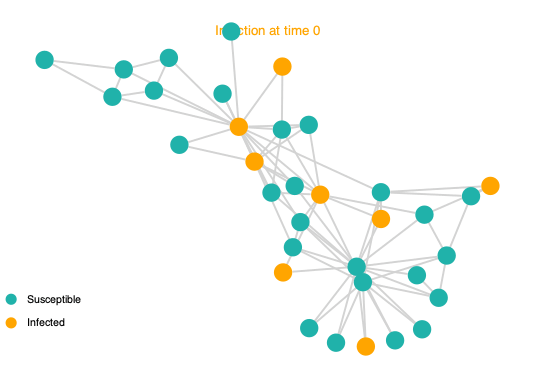

Graph saved

┌ Info: Saved animation to 
│   fn = /Users/julienblanchon/Git/julien-blanchon/Le-TP-de-Keunotor4/graphes/projet/ProjetTheorieDesGraphes/SIS_model.gif
└ @ Plots /Users/julienblanchon/.julia/packages/Plots/UeTBV/src/animation.jl:114


In [12]:
# Test on Karat7
N = nv(karat7) # number of vertices
new_state = SIS(karat7, init_infection(karat7, rand(1:nv(karat7))), 0.5, 0.7, 20)
print("Graph saved")
showgif("SIS_model.gif")


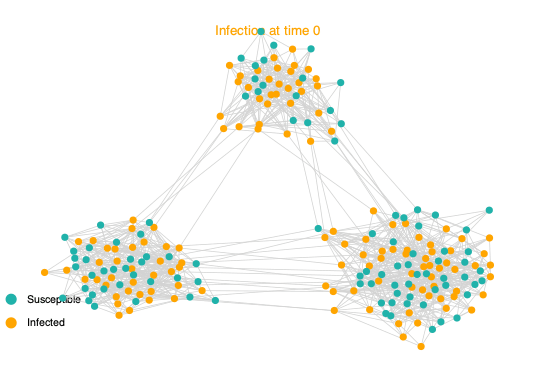

Graph saved

┌ Info: Saved animation to 
│   fn = /Users/julienblanchon/Git/julien-blanchon/Le-TP-de-Keunotor4/graphes/projet/ProjetTheorieDesGraphes/SIS_model.gif
└ @ Plots /Users/julienblanchon/.julia/packages/Plots/UeTBV/src/animation.jl:114


In [13]:
# Test on N7_2A
N = nv(n7_2A) # number of vertices
new_state = SIS(n7_2A, init_infection(n7_2A, rand(1:nv(n7_2A))),0.5, 0.7, 20)
print("Graph saved")
showgif("SIS_model.gif")


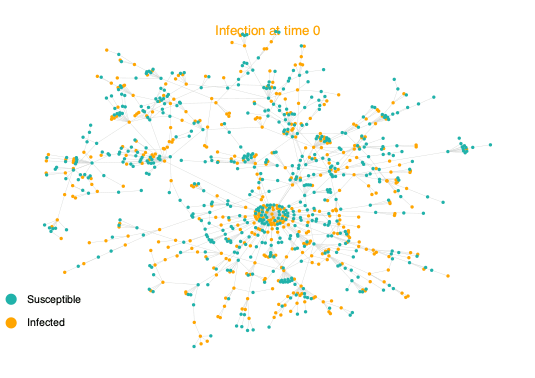

Graph saved

┌ Info: Saved animation to 
│   fn = /Users/julienblanchon/Git/julien-blanchon/Le-TP-de-Keunotor4/graphes/projet/ProjetTheorieDesGraphes/SIS_model.gif
└ @ Plots /Users/julienblanchon/.julia/packages/Plots/UeTBV/src/animation.jl:114


In [14]:
# Test on Toulouse_neigh
N = nv(toulouse_neigh) # number of vertices
new_state = SIS(toulouse_neigh, init_infection(toulouse_neigh, rand(1:nv(toulouse_neigh))), 0.5, 0.7, 20)
print("Graph saved")
showgif("SIS_model.gif")

<div style="width:75%;margin:0 auto;">

### 1.4 Simulate and understand the epidemic
    
<p style="text-align:justify;">In the SIS model of this project, every disease is characterized by:
    
* The infection rate $\beta$ representing the chance of infection when being in contact with an infected individual.
* The curing rate $\alpha$ representing the chance of being cured of the disease.
* The effective spreading rate $\tau=\frac{\beta}{\alpha}$ representing the capacity of the disease to spread. More the disease infect easily ($\beta$ high) and less it is cured easily ($\alpha$ low) more $\tau$ can be high.

We are now willing to understand what are the influences of these parameters as well as the contact network shape on an epidemic.</p>

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 4 (written):</strong> The <code>function SIS</code> you implemented launches one run of an SIS model on a given contact network. As it makes use of randomness, one run of spreading is stochastic. Then what simple method can you propose to provide a prediction of the disease spreading on a given contact network ?
   
<br>
    
<div style="background-color:#E7F1D1"> <Strong>Answer:</Strong></div>

As for a given (initial) contact network the outcome <code>function SIS</code> is stochastic we may want to aggregate the result of several runs instead of a single one, in order to provide a less randomnised numerical result. This is called a Monte-Carlo method (multiple runs of a simulation with same parameters).

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 5 (code):</strong> Implement the <code>function Simulation_SIS</code> (respect the header and the specifications).
    
<span style="font-size:0.9em">The corrector should be able to write <code>predictions, taus = Simulation_SIS(net,nbinf,betas,alphas,t,nbsimu)</code> with your code.</span>

In [15]:
function SIS_simu(net, nbinf, beta, alpha, t)
    out = zeros(Float64, t+1)

    # initial state
    state = init_infection(net, nbinf)
    out[1] = nbinf

    # apply step by step and compute number of infected
    for step in 1:t
        state = SIS_step(net, state, beta, alpha) # apply one step #SIS(net, state, beta, alpha, 1)
        out[step+1] = sum(state) # number of infected
    end
    # percentage of infected
    return out/length(state)
end

SIS_simu (generic function with 1 method)

In [16]:
function Simulation_SIS(net,nbinf,betas,alphas,t,nbsimu)
    """Take a contact network, different diseases (defined by 
    different parameters alpha and beta), a number of initial
    infected people and process nbsimu simulations of SIS over
    t time steps. You will provide the prediction of the 
    percentage of infected at each time t as well as the 
    spreading rate of each disease.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       nbinf (Int32): number of infected at the start of each 
            simulation
       betas (Array{Float64,1}): array of infection rate on edges
       alphas (Array{Float64,1}): array of curing rate on vertices
       t (Int32): number of time step
       nbsimu (Int32): number of simulations
    
    RETURNS
        (Array{Float64,2}): the prediction of the percentage of 
            infected at each time step and for each disease. The 
            first dimension contains the time steps and the second
            contains the diseases
        (Array{Float64,1}): effective spreading rate for each 
            disease
    """
    # TODO
    N = length(betas) # number of different diseases
    predictions = zeros(Float64, (t+1, N))
    
    for i in 1:N
        # parameters
        beta, alpha = betas[i], alphas[i]
        
        # simulate nbsimu times
        pred = zeros(Float64, t+1)
        for sim in 1:nbsimu
            pred += SIS_simu(net, nbinf, beta, alpha, t)
        end

        # compute mean of all simulations (law of large numbers)
        pred = pred/nbsimu 
        predictions[:,i] = pred
        
    end

    return predictions, betas./alphas
end

Simulation_SIS (generic function with 1 method)

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 6 (written)</strong>: Run the 2 scripts below and describe what you see. Conclude on the influence of $\tau$, $\beta$, and $\alpha$ on an epidemic we can model with SIS.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer:</strong></div>

For a given effective spreading rate $\tau = \frac{\beta}{\alpha}$ the infection rate converge to a given limit (for example each following example with $\tau=1.0$ converge to $\approx 0.9$). This limit of infection rate correspond to the limit state of the contact graph. This limit state is a one of the stable state of the problem.

However the convergence behavior may be quite different for each pair of $\alpha$, $\beta$. For example in the following graph the green with $\alpha = 0.01$ and $\beta = 0.01$ (resp pink $\alpha = 0.005$ and $\beta = 0.01$) line converge much more slowly then the blue and orange one (resp light blue) with the same $\alpha$ ratio. 

For example the blue line converge much more quickly then the green one, because both the infection rate and the cure rate or lower for the green one then the blue one.

Plus the contact graph itself change a lot the behavior of the epidemic.

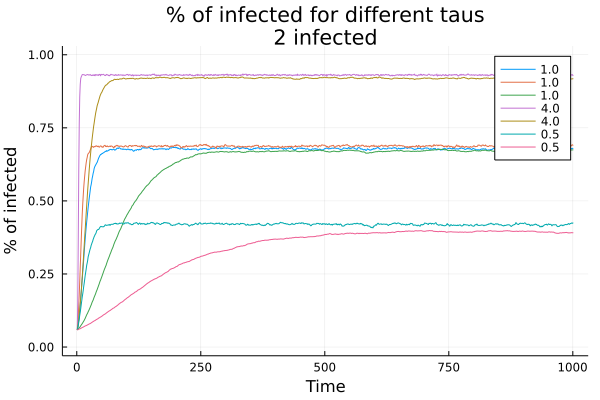

In [17]:
# Script launching predictions on different diseases on karat7 and printing 
# the precentage of infected at each time step.
betas=[0.05,0.1,0.01,0.4,0.04,0.05,0.005]
alphas=[0.05,0.1,0.01,0.1,0.01,0.1,0.01]

pred_sis_karat_1, taus = Simulation_SIS(karat7,2,betas,alphas,1000,1000)

Plots.plot(pred_sis_karat_1, label=taus',xlabel="Time",ylabel="% of infected", ylim = [0, 1],title="% of infected for different taus\n2 infected")

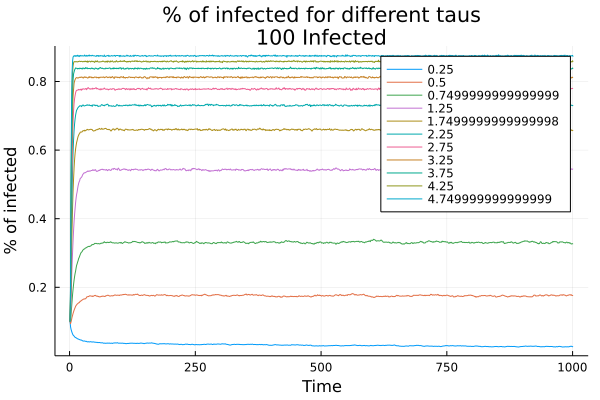

In [18]:
# Same as before but applied on toulouse_neigh. May be a bit long to run.
betas = [0.05,0.1,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
alphas = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]

predictions, taus = Simulation_SIS(toulouse_neigh,100,betas,alphas,1000,100)

Plots.plot(predictions, label=taus',xlabel="Time",ylabel="% of infected",title="% of infected for different taus\n100 Infected")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 7 (written):</strong> Change the initial number of infected in the scripts above, is it in accordance with your answer in Question 2 ?
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer:</strong></div>

As previously mentioned, the SIS model converges for all $t > t_{eq}$ to a limit (equilibrium) state which may be above or below the initial number of infected people. This last information is important as we will see later.

The following graph represents the % of infected people for different pairs of $\beta, \alpha$ and with an initial number of infected people equal to $\frac{3}{4}$ of the population.

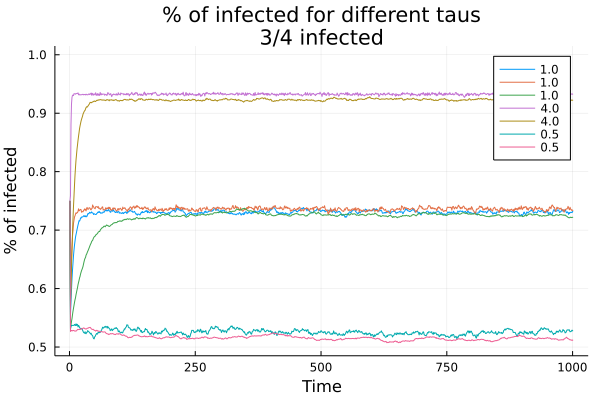

In [19]:
# Change the initial number of infected
betas=[0.05,0.1,0.01,0.4,0.04,0.05,0.005]
alphas=[0.05,0.1,0.01,0.1,0.01,0.1,0.01]
pred_sis_karat_2, taus = Simulation_SIS(karat7,3*nv(karat7)/4,betas,alphas,1000,1000)

Plots.plot(pred_sis_karat_2, label=taus',xlabel="Time",ylabel="% of infected", ylim = [1/2, 1],title="% of infected for different taus\n3/4 infected")

It is very similar to the graph shown in the question 6

Intuitively, we may think that as the number of infected people increases, the SIS model converges quicker. However, as the following graph shows, if we take tau = 0.25 and 3/4 of the population infected, the SIS model takes at least 5000 time steps to reach equilibrium:

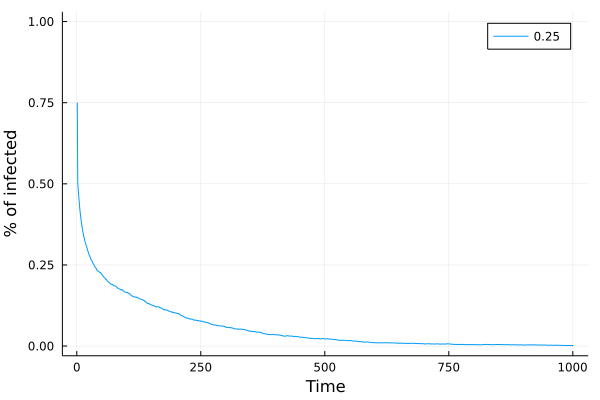

In [20]:
# Change the initial number of infected
betas=[0.025]
alphas=[0.1]
pred_sis_karat_2, taus = Simulation_SIS(karat7,3*nv(karat7)/4,betas,alphas,1000,1000)

Plots.plot(pred_sis_karat_2, label=taus',xlabel="Time",ylabel="% of infected", ylim = [0, 1], title="")

Therefore, the initial number of infected people doesn't affect the convergence speed (at least, not strongly). Let's plot the SIS model for different pairs of $(\beta, \alpha)$: 

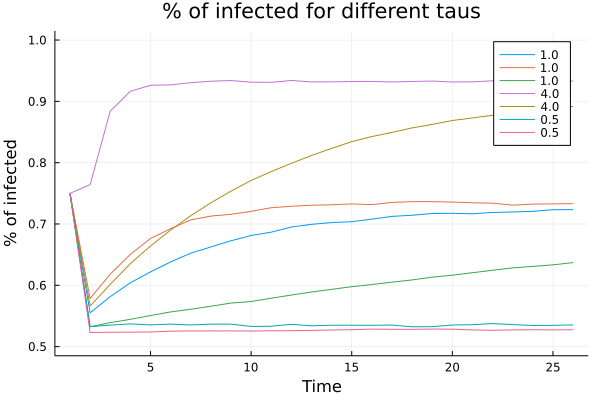

In [21]:
# Change the initial number of infected
betas=[0.05,0.1,0.01,0.4,0.04,0.05,0.005]
alphas=[0.05,0.1,0.01,0.1,0.01,0.1,0.01]
pred_sis_karat_2, taus = Simulation_SIS(karat7,3*nv(karat7)/4,betas,alphas,25,1000)

Plots.plot(pred_sis_karat_2, label=taus',xlabel="Time",ylabel="% of infected", ylim = [1/2, 1],title="% of infected for different taus")

By comparing the obtained graph to the one in Q6, we notice that the value of the initial number of infected people affects the behaviour of the convergence curve. Indeed, for tau=4.0, the equilibrium is above init_infection and therefore, the SIS model converges quickly. For tau=1.0, we need to analyse further : 

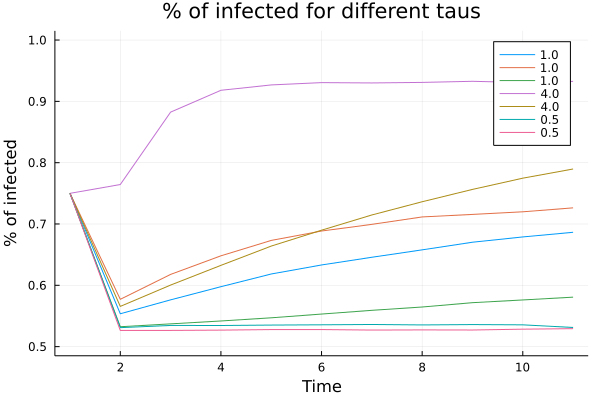

In [22]:
# Change the initial number of infected
betas=[0.05,0.1,0.01,0.4,0.04,0.05,0.005]
alphas=[0.05,0.1,0.01,0.1,0.01,0.1,0.01]
pred_sis_karat_2, taus = Simulation_SIS(karat7,3*nv(karat7)/4,betas,alphas,10,1000)

Plots.plot(pred_sis_karat_2, label=taus',xlabel="Time",ylabel="% of infected", ylim = [1/2, 1],title="% of infected for different taus")

As previously mentioned, for $\tau = 1.0$ the initial state is above the equilibrium and, even though the percentage of infected people is high, it is not the equilibrium state. Therefore, the model goes, more or less quickly depending on the distance between the equilibrium and the initial state, to a transitory state in the first time steps (with less % of infected people than the equilibrium) to then reach the equilibrium. Thus the growth inversion.

The same analysis can be applied to the toulouse neighbours model:

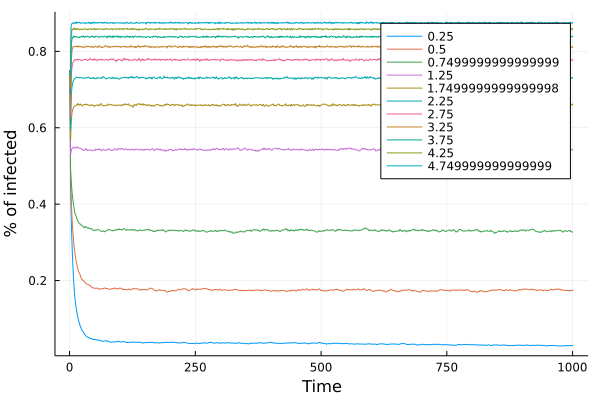

In [23]:
# Change the initial number of infected
betas = [0.05,0.1,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
alphas = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
predictions, taus = Simulation_SIS(toulouse_neigh,3*nv(toulouse_neigh)/4,betas,alphas,1000,100)

Plots.plot(predictions, label=taus',xlabel="Time",ylabel="% of infected")

In the following graph, we can clearly see the effect of the initial percentage of infected people on the convergence:

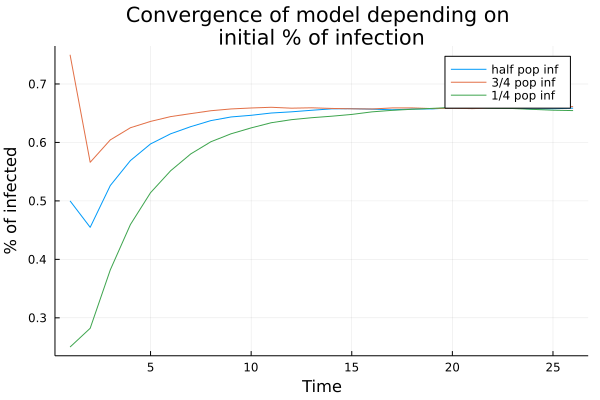

In [24]:
# Change the initial number of infected
betas = [0.35]
alphas = [0.2]
out = zeros(Float64, (26,3))
predictions, taus = Simulation_SIS(toulouse_neigh,1*nv(toulouse_neigh)/2,betas,alphas,25,100)
out[:,1] = predictions

predictions, taus = Simulation_SIS(toulouse_neigh,3*nv(toulouse_neigh)/4,betas,alphas,25,100)
out[:,2] = predictions

predictions, taus = Simulation_SIS(toulouse_neigh,1*nv(toulouse_neigh)/4,betas,alphas,25,100)
out[:,3] = predictions

Plots.plot(out,label=["half pop inf" "3/4 pop inf" "1/4 pop inf"],xlabel="Time",ylabel="% of infected", title="Convergence of model depending on \ninitial % of infection")


As the initial percentage of infected people decreases, the model goes less quickly to a transitory state.

In [25]:
function convergence(prediction, thresh)
    """Take prediction from an epidemic model and returns the time t
    of convergence to an equilibrium state
    PARAMS
        prediction (Array{Float64,2}): the prediction of the percentage of 
            infected at each time step and for each disease. The 
            first dimension contains the time steps and the second
            contains the diseases
        thresh (Float64): threshold level of convergence
    RETURNS
        equi_state (Array{Float64,2}): percentage of infected
            at equilibrium state
        equi_time (Int32): time at convergence
    """
    
    N = length(prediction)
    i = 1
    equi_time = N
    equi_state = 0

    for i in 2:(N)
        old_value = prediction[i-1]
        new_value = prediction[i]
        
        if abs(old_value - new_value) <= thresh
            equi_time = i
            equi_state = new_value
            break
        end
    end

    return equi_state, equi_time
end

convergence (generic function with 1 method)

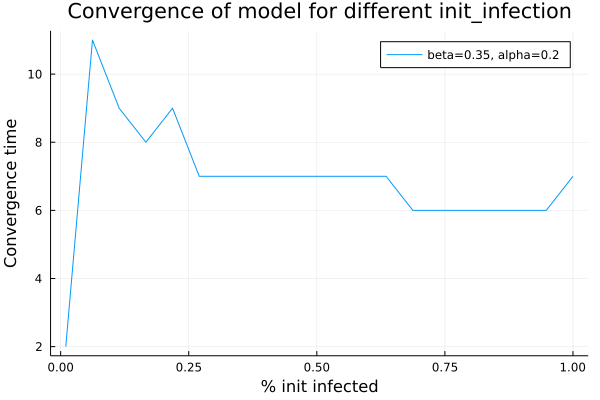

In [26]:
init = LinRange(0.01,1,20) #[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
betas = [0.35]
alphas = [0.2]
out = zeros(Float64, length(init))
out2 = zeros(Float64, length(init))
#infected = zeros(Int32, length(init))
i = 1

for coeff in init
    pred, taus = Simulation_SIS(karat7,Int32(round(coeff*nv(karat7))),betas,alphas,1000,1000)
    state, time = convergence(pred, 0.005)
    out[i] = time
    out2[i] = state
    i += 1
end

Plots.plot(init, out, label="beta=0.35, alpha=0.2",xlabel="% init infected",ylabel="Convergence time", title="Convergence of model for different init_infection")

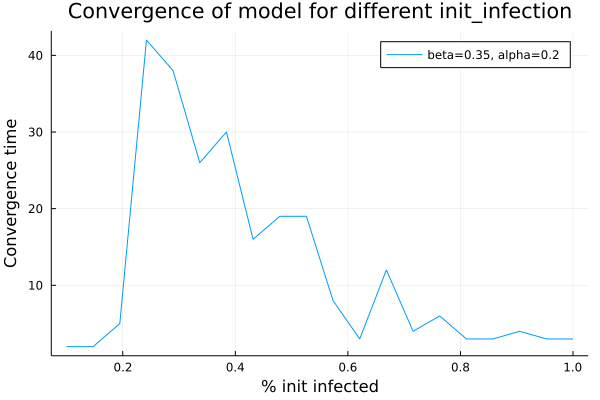

In [27]:
betas=[0.01]
alphas=[0.01]

init = LinRange(0.1,1,20) #[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
out = zeros(Float64, length(init))
out2 = zeros(Float64, length(init))
#infected = zeros(Int32, length(init))
i = 1

for coeff in init
    pred, taus = Simulation_SIS(karat7,Int32(round(coeff*nv(karat7))),betas,alphas,1000,1000)
    state, time = convergence(pred, 0.005)
    out[i] = time
    out2[i] = state
    i += 1
end

Plots.plot(init, out, label="beta=0.35, alpha=0.2",xlabel="% init infected",ylabel="Convergence time", title="Convergence of model for different init_infection")


<div style="width:75%;margin:0 auto;">

<strong style="color:cornflowerblue">Question 8 (code):</strong> Implement a script plotting the maximum percentage of infected people according to $\tau$ over 300 time steps for 3 contact networks:

* A regular graph of 200 vertices with degree 2.
* A regular graph of 200 vertices with degree 5.
* A regular graph of 200 vertices with degree 10.

You can use the function <code>random_regular_graph(n,d)</code> of LightGraphs. As you probably need to use a certain number of different values of $\tau$ to visualize something interesting (the more there are the more the figure will be smooth) you should fix $\alpha$ and make $\beta$ vary. 

<span style="font-size:0.9em">A regular graph is a graph where each vertex has the same degree.</span>

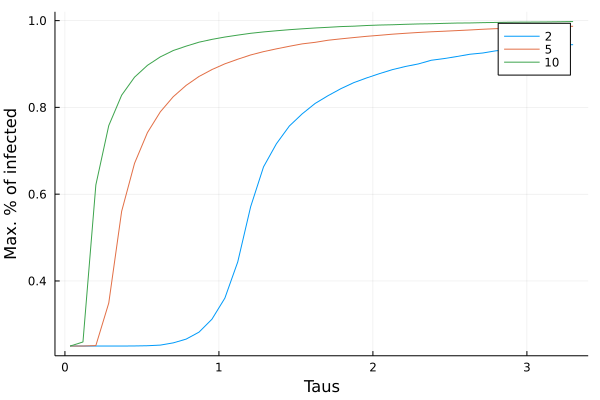

In [28]:
# Plots of the maximum percentage of infected people according to tau over 300 time 
# steps for 3 contact networks.

degrees = [2,5,10]
n = 200 # vertices
alpha = 0.3
N_beta = 40
betas = LinRange(0.01, 0.99, N_beta)
out = zeros(Float64, (N_beta, length(degrees)))
nbsimu = 500
taus = betas/alpha

for i in 1:length(degrees)
    d = degrees[i]
    for j in 1:N_beta
        beta = betas[j]
        max_percentage = 0
        for sim in 1:nbsimu
            max_percentage += maximum(SIS_simu(random_regular_graph(n,d), 1*n/4, beta, alpha, 300))
        end
        max_percentage = max_percentage/nbsimu
        out[j,i] = max_percentage
    end
end

Plots.plot(taus, out, label=degrees',xlabel="Taus",ylabel="Max. % of infected")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 9 (written):</strong> Describe the figure and draw conclusions on the epidemic behavior for different degrees $d$ on regular graphs. Thus, in addition of the inner properties of the disease ($\alpha$, $\beta$, $\tau$) what other parameter is essential in the spreading ? Finally, what analogy can be done with real life from this experiment ?
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer:</strong></div>

The higher the degree $d$, faster the population will get infected. This behavior is quite logic since an higher degree is synonym of a more connected graph. So the more people are interconnected with each other, faster the epidemic will be. In addition to the inner properties of the disease (*ie* $\alpha$, $\beta$, $\tau$) and the inner properties of the contact graph (*ie* degree $d$) the initial infected population also play a role in the speed of the convergence.

This behavior is quite related with the concept of **social distancing** and **lockdown**. In the case of a lockdown, as social relationships are drastically reduced the **degree** $d$ is also reduced, so the spread of the epidemic is therefore proportionally decreased (**flatten the curve**).

<div style="width:75%;margin:0 auto;">

## Part 2 - SIR and SAIR model
<a id='part2'></a>
    
<p style="text-align:justify;">Unfortunately SIS model is valuable for diseases we can catch back since a cured person can get ill again. This is true for the flu, the cold, etc. However COVID-19 might create immunity for whom already got it and SIS can not take into account immune or dead persons. That is why we propose in this part to consider another model more adapted to COVID-19 called SIR. It stands for Susceptible $\rightarrow$ Infected $\rightarrow$ Recovered where the susceptible group contains those who remain susceptible to the infection, the infected group consists of those who not only have the disease but are also in the contagious period of the disease, and the recovered group contains those who were ill, got cured, are not contagious and can not get ill anymore.</p>

<br>

<p style="font-size:0.9em">M. Youssef and C. Scoglio, <cite>"An individual-based approach to SIR epidemics in contact networks"</cite>, Journal of Theoretical Biology 283 (2011)</p>

<br>
    
<p style="text-align:justify;"> One limitation of SIR is that it does not model the reaction of humans when they feel the presence of the epidemic. Indeed, if feeling threaten or surrounded by infected, an individual may change its behaviors: wear mask, wash its hands, etc. This result in a smaller infection rate. That is why in this part we will also consider a variant of SIR called SAIR which stands for Susceptible $\rightarrow$ Alert $\rightarrow$ Infected $\rightarrow$ Recovered. A susceptible individual becomes infected by the infection rate $\beta_0$, an infected individual recovers and gets immune by the curing rate $\alpha$, an individual can observe the states of its neighbors, then a susceptible individual might go to the alert state if surrounded by infected individuals with an alert rate $\kappa$ on each contact with an infected, an alert inividual becomes infected by the infection rate $\beta_1$ where $0<\beta_1<\beta_0$. In our simple SAIR model, an individual can not go back to a susceptible state when he got into the alert state.</p>
    
<br>
    
<p style="font-size:0.9em"> F. Darabi Sahneh and C. Scoglio, <cite>"Epidemic Spread in Human Networks"</cite>, 50th IEEE Conf. Decision and Contol, Orlando, Florida (2011)</p>

<div style="width:75%;margin:0 auto;">

### 2.1 SIR
    
<p style="text-align:justify;">The vector containing the disease status <code>state</code> has to change a bit since we added a new state. Hence it will be an <code>Array{Int32,1}</code> where Susceptible=0, Infected=1, and Recovered=2.</p>

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 10 (code):</strong> Implement the <code>function SIR</code> (respect the header and the specifications). You can use <code>rand</code> to translate the probabilities. Test your algorithm on <code>karat7</code>, <code>n7_2A</code>, and <code>toulouse_neigh</code> with arbitrary $\beta$, $\alpha$, and $t$. Recovered vertices should appear in a different color (<code>colorant"purple"</code>).
    
<span style="font-size:0.9em">The corrector should be able to write <code>new_state = SIR(net,state,beta,alpha,t)</code> with your code.</span>

In [29]:
function SIR_step(net,state,beta,alpha)
    """Take a contact network at a certain state and apply 1 time step
    of an SIR model.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       beta (Float64): infection rate
       alpha (Float64): curing rate
    
    RETURNS
        (Array{Int32,1}): The new state of the contact network after 1 time step.
    """ 
    index_inf = findall(x->x==1, state)

    for infected in index_inf
        contact_cases = inneighbors(net, infected)

        # Infected -> Recovered
        if rand() >= 1 - alpha
            state[infected] = 2
        end
        # Susceptible -> Infected
        for case in contact_cases
            if (rand() >= 1 - beta) && (state[case] == 0)
                state[case] = 1
            end
        end
    end
    return state

end

SIR_step (generic function with 1 method)

In [30]:
function SIR(net,state,beta,alpha,t)
    """Take a contact network at a certain state and apply t time steps
    of an SIR model.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       beta (Float64): infection rate
       alpha (Float64): curing rate
       t (Int32): number of time step
    
    RETURNS
        (Array{Int32,1}): The new state of the contact network after t time steps.
    """
    # TODO
    locs_x, locs_y = spring_layout(net) # location of vertices
    anim=Animation()
    nodecolor = [colorant"lightseagreen", colorant"orange", colorant"purple"]
    old_state = copy(state)
    anim = animate_graph(anim, net, old_state, 0, locs_x, locs_y, nodecolor)

    for step in 1:t
        old_state = SIR_step(net, old_state, beta, alpha)
        anim = animate_graph(anim, net, old_state, step, locs_x, locs_y, nodecolor)
        
    end
    gif(anim, "SIR_model.gif", fps = 2)
    return old_state
end

SIR (generic function with 1 method)


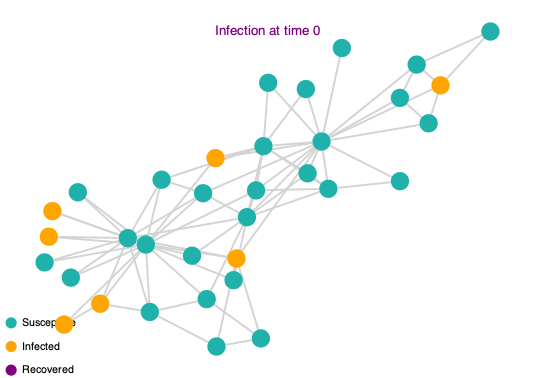

Graph saved

┌ Info: Saved animation to 
│   fn = /Users/julienblanchon/Git/julien-blanchon/Le-TP-de-Keunotor4/graphes/projet/ProjetTheorieDesGraphes/SIR_model.gif
└ @ Plots /Users/julienblanchon/.julia/packages/Plots/UeTBV/src/animation.jl:114


In [31]:
# Test on Karat7
N = nv(karat7) # number of vertices
SIR(karat7, init_infection(karat7, nv(karat7)/4), 0.4, 0.2, 30)
print("Graph saved")
showgif("SIR_model.gif")


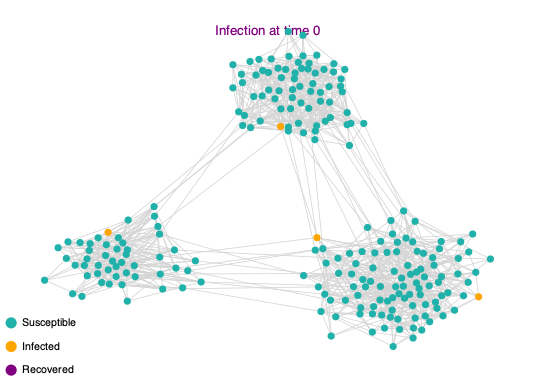

Graph saved

┌ Info: Saved animation to 
│   fn = /Users/julienblanchon/Git/julien-blanchon/Le-TP-de-Keunotor4/graphes/projet/ProjetTheorieDesGraphes/SIR_model.gif
└ @ Plots /Users/julienblanchon/.julia/packages/Plots/UeTBV/src/animation.jl:114


In [32]:
# Test on N7_2A
N = nv(n7_2A) # number of vertices
SIR(n7_2A, init_infection(n7_2A, 4),0.4, 0.2, 20)
print("Graph saved")
showgif("SIR_model.gif")


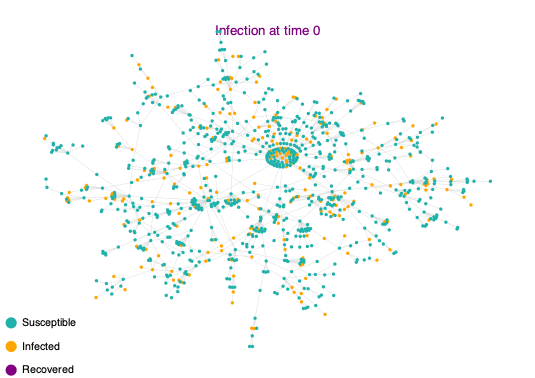

Graph saved

┌ Info: Saved animation to 
│   fn = /Users/julienblanchon/Git/julien-blanchon/Le-TP-de-Keunotor4/graphes/projet/ProjetTheorieDesGraphes/SIR_model.gif
└ @ Plots /Users/julienblanchon/.julia/packages/Plots/UeTBV/src/animation.jl:114


In [33]:
# Test on Toulouse_neigh
N = nv(toulouse_neigh) # number of vertices
SIR(toulouse_neigh, init_infection(toulouse_neigh, nv(toulouse_neigh)/4), 0.5, 0.2, 50)
print("Graph saved")
showgif("SIR_model.gif")

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 11 (code):</strong> Implement the <code>function Simulation_SIR</code> (respect the header and the specifications).
    
<span style="font-size:0.9em">The corrector should be able to write <code>predictions, taus = Simulation_SIR(net,nbinf,betas,alphas,t,nbsimu)</code> with your code.</span>

In [34]:
function SIR_simu(net, nbinf, beta, alpha, t)
    out = zeros(Float64, (t+1,3))
    
    # initial state
    state = init_infection(net, nbinf)
    N = length(state)
    out[1,:] = [(nbinf)/N, 0, (N - nbinf)/N]

    # apply step by step and compute number of infected, recovered and susceptible
    for step in 1:t
        state = SIR_step(net, state, beta, alpha) # apply one step #SIS(net, state, beta, alpha, 1)
        out[step+1,:] = [count(x->x==1, state),count(x->x==2, state),count(x->x==0, state)]/N
    end

    return out
end

SIR_simu (generic function with 1 method)

In [35]:
function Simulation_SIR(net,nbinf,betas,alphas,t,nbsimu)
    """Take a contact network, different diseases (defined by 
    different parameters alpha and beta), a number of initial
    infected people and process nbsimu simulations of SIR over
    t time steps. You will provide the prediction of the 
    percentage of infected at each time t as well as the 
    spreading rate of each disease.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       nbinf (Int32): number of infected at the start of each 
            simulation
       betas (Array{Float64,1}): array of infection rate on edges
       alphas (Array{Float64,1}): array of curing rate on vertices
       t (Int32): number of time step
       nbsimu (Int32): number of simulations
    
    RETURNS
        (Array{Float64,3}): the prediction of the percentage of 
            infected, the percentage of susceptible and the 
            percentage of recovered at each time step and for each 
            disease. The first dimension contains the time steps,
            the second contains the diseases, and the third the status
            (Infected: [:,:,1], Recovered: [:,:,2], Susceptible: [:,:,3])
        (Array{Float64,1}): effective spreading rate for each 
            disease
    """
    # TODO
    N = length(betas)
    predictions = zeros(Float64, (t+1,N,3))
    
    for i in 1:N
        # parameters
        beta, alpha = betas[i], alphas[i]
        
        # simulate nbsimu times
        pred = zeros(Float64, (t+1,3))
        for sim in 1:nbsimu
            pred += SIR_simu(net, nbinf, beta, alpha, t)
        end

        # compute mean of all simulations
        pred = pred/nbsimu
        predictions[:,i,:] = pred

    end
    return predictions, betas./alphas
end

Simulation_SIR (generic function with 1 method)

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 12 (written):</strong> Run the script below and describe what you see. Why does the infected curve not behave the same as for SIS ? 
    
<br>

<div style="background-color:#E7F1D1"> <strong>Answer:</strong></div>

In the SIR model, we introduce a new status variable: **Recovered**. Therefore, unlike the SIS model, there is no cycle anymore (Susceptible $\leftrightarrow$ Infected), now: Susceptible $\rightarrow$ Infected $\rightarrow$ Recovered. The number of Susceptible people will decrease as the infection rate is non-zero and the number of Recovered will increase as the curing rate is non-zero. 

However, there is a transitionnary state: Infected that, since there is a fixed number of people in the model, will have $n_{infected} = n_{total} - n_{susceptible} - n_{recovered}$. Hence, Infected increases at its rate and when both Susceptible and Recovered curves cross, Infected reaches its peak. Then, it will slowly decrease as people will recover from the disease.

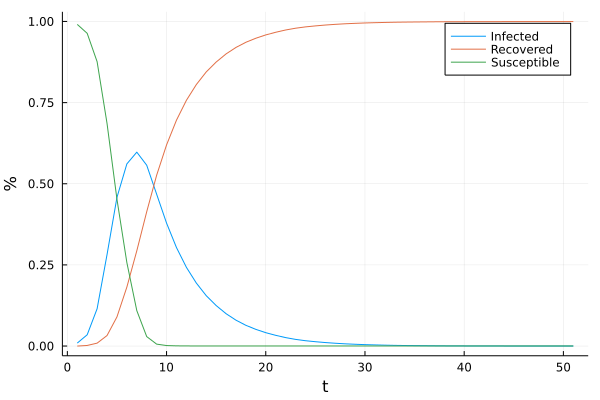

In [36]:
# Script launching prediction on one disease on n7_2A and plotting the percentage
# of infected, susceptible and recovered at each time step.

predictions, taus = Simulation_SIR(n7_2A,2,[0.3],[0.2],50,1000)

Plots.plot([predictions[:,:,1] predictions[:,:,2] predictions[:,:,3]],
           label=["Infected" "Recovered" "Susceptible"],xlabel="t",ylabel="%")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 13 (written):</strong> As for Question 6 script 2 plot the evolution of the percentage of infected for many $\tau$. Describe what you see.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer:</strong></div>

In the SIR model, we added a Recovered status variable which is terminal (Recovered cannot get Infected again).

From the graph we see that, independently of the value of $\tau$, the number of infected people decreases, due to the initial number of infected people being quite high, until it reaches zero.

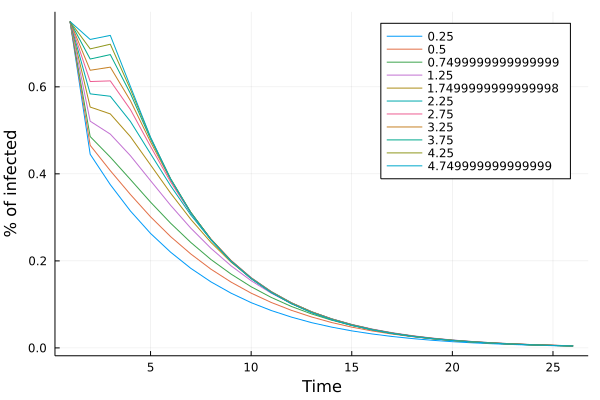

In [37]:
# Equivalent experiment as for Question 6 script 2
betas = [0.05,0.1,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
alphas = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]

predictions, taus = Simulation_SIR(toulouse_neigh,3/4*nv(toulouse_neigh),betas,alphas,25,1000)

Plots.plot(predictions[:,:,1], label=taus',xlabel="Time",ylabel="% of infected")

By changing the initial number to a lower value, the percentage first increases until it reaches its peak and then decreases to zero. As $\tau$ decreases, the peak gets smaller up to non-existent for really low values (below one).

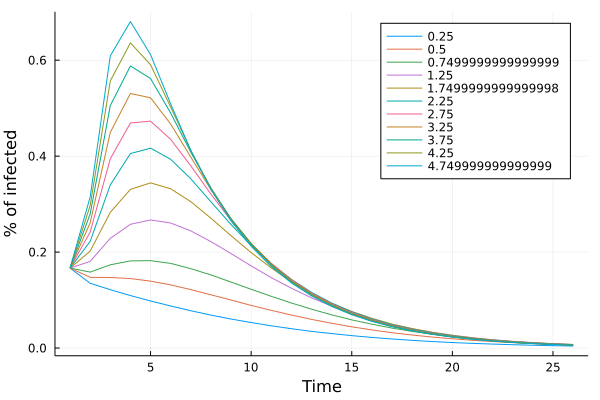

In [38]:
# Equivalent experiment as for Question 6 script 2
betas = [0.05,0.1,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
alphas = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]

predictions, taus = Simulation_SIR(toulouse_neigh,1/6*nv(toulouse_neigh),betas,alphas,25,1000)

Plots.plot(predictions[:,:,1], label=taus',xlabel="Time",ylabel="% of infected")

<div style="width:75%;margin:0 auto;">

<strong style="color:cornflowerblue">Question 14 (code):</strong> Implement a script plotting the number of infected over 75 time steps for $\beta=0.3$ and $\alpha=0.2$ fixed and on 3 contact networks:
    
* A regular graph of 200 vertices with degree 2.
* A regular graph of 200 vertices with degree 5.
* A regular graph of 200 vertices with degree 10.
    

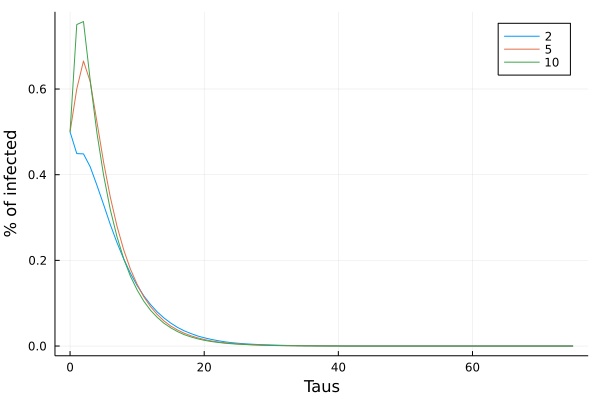

In [39]:
# Plots of the number of infected people according to tau over 75 time 
# steps for 3 contact networks.

degrees = [2,5,10]
n = 200 # vertices
alpha = 0.2
beta = 0.3
t = 75
out = zeros(Float64, (t+1, length(degrees)))
nbsimu = 1000
nbinf = 100

for i in 1:length(degrees)
    d = degrees[i]

    for simu in 1:nbsimu
        net = random_regular_graph(n,d)
        state = init_infection(net, nbinf)

        out[1,i] += nbinf/n

        for step in 1:t
            state = SIR_step(net, state, beta, alpha) # apply one step #SIS(net, state, beta, alpha, 1)
            out[step+1,i] += count(x->x==1, state)/n
        end
    end
    out[:,i] = out[:,i]/nbsimu
    

end

Plots.plot(LinRange(0, t, t+1), out, label=degrees',xlabel="Taus",ylabel="% of infected")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 15 (written):</strong> From the previous figure, explain why lockdown can be interesting when hospital places are lacking ?

<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer:</strong></div>

In the previous figure, we created three graphs with different degrees. The degree of a vertix represents the number of edges it has to other vertices or, in other words, the connections with other people.

In the graph, we see that, as the degree decreases, the peak of the curves decrease. Therefore, limiting connections with for example, a lockdown, avoids reaching a peak in the epidemic.

<div style="width:75%;margin:0 auto;">

### 2.2 SAIR
    
<p style="text-align:justify;">The vector containing the disease status <code>state</code> has to change a bit since we added a new state. Hence it will be an <code>Array{Int32,1}</code> where Susceptible=0, Infected=1, Recovered=2, and Alert=3.</p>

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 16 (code):</strong> Implement the <code>function SAIR</code> (respect the header and the specifications). You can use <code>rand</code> to translate the probabilities. Test your algorithm on <code>karat7</code>, <code>n7_2A</code>, and <code>toulouse_neigh</code> with arbitrary $\beta$, $\alpha$, and $t$. Alerted vertices should appear in a different color (<code>colorant"lightgreen"</code>).
    
<span style="font-size:0.9em">The corrector should be able to write <code>new_state = SAIR(net,state,beta0,beta1,alpha,kappa,t)</code> with your code.</span>

In [40]:
function SAIR_step(net,state,beta0,beta1,alpha,kappa)
    """Take a contact network at a certain state and apply 1 time step
    of an SAIR model.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       beta0 (Float64): infection rate when not alert
       beta1 (Float64): infection rate when alert
       alpha (Float64): curing rate
       kappa (Float64): alerting rate
       t (Int32): number of time step
    
    RETURNS
        (Array{Int32,1}): The new state of the contact network after 1 time step.
    """  
    index_inf = findall(x->x==1, state)
    index_suscept = findall(x->x==0, state)
    index_alert = findall(x->x==3, state)
    coeff_alert = 1/2

    # loop through all alerts
    for alert in index_alert
        neighb = inneighbors(net, alert)
        N_neigh = length(neighb)
        
        # Alert not surrounded by Infected anymore
        # becomes Susceptible
        if count(x->x==1,state[neighb]) != coeff_alert*N_neigh
            state[alert] = 0
        end
    end

    # loop through all susceptibles
    for susceptible in index_suscept
        neighb = inneighbors(net, susceptible)
        N_neigh = length(neighb)

        # neighbours of Susceptible are Infected
        # change the coeff?
        if count(x->x==1,state[neighb]) == coeff_alert*N_neigh
            # becomes Alert
            if rand() >= 1 - kappa
                state[susceptible] = 3
            end
        end
    end

    # loop through Infected
    for infected in index_inf
        contact_cases = inneighbors(net, infected)

        # Infected -> Recovered
        if rand() >= 1 - alpha
            state[infected] = 2
        end

        # Susceptible or Alert -> Infected
        for case in contact_cases
            if (rand() >= 1 - beta0) && (state[case] == 0)
                state[case] = 1
            elseif (rand() >= 1 - beta1) && (state[case] == 3)
                state[case] = 1
            end
        end
    end
    
    
    return state

end

SAIR_step (generic function with 1 method)

In [41]:
function SAIR(net,state,beta0,beta1,alpha,kappa,t)
    """Take a contact network at a certain state and apply t time steps
    of an SAIR model.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       beta0 (Float64): infection rate when not alert
       beta1 (Float64): infection rate when alert
       alpha (Float64): curing rate
       kappa (Float64): alerting rate
       t (Int32): number of time step
    
    RETURNS
        (Array{Int32,1}): The new state of the contact network after t time steps.
    """      
    locs_x, locs_y = spring_layout(net) # location of vertices
    anim=Animation()
    nodecolor = [colorant"lightseagreen", colorant"orange", colorant"purple", colorant"lightgreen"]
    old_state = copy(state)
    anim = animate_graph(anim, net, old_state, 0, locs_x, locs_y, nodecolor)

    for step in 1:t
        old_state = SAIR_step(net, old_state, beta0, beta1, alpha, kappa)
        anim = animate_graph(anim, net, old_state, step, locs_x, locs_y, nodecolor)
        
    end
    gif(anim, "SAIR_model.gif", fps = 2)
    return old_state
end

SAIR (generic function with 1 method)


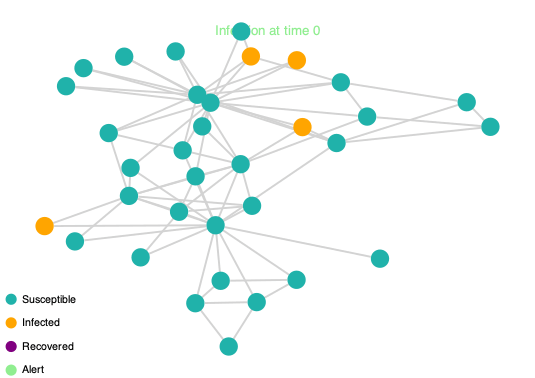

Graph saved

┌ Info: Saved animation to 
│   fn = /Users/julienblanchon/Git/julien-blanchon/Le-TP-de-Keunotor4/graphes/projet/ProjetTheorieDesGraphes/SAIR_model.gif
└ @ Plots /Users/julienblanchon/.julia/packages/Plots/UeTBV/src/animation.jl:114


In [42]:
# Test on Karat7
N = nv(karat7) # number of vertices
SAIR(karat7, init_infection(karat7, 4), 0.2, 0.2, 0.3, 0.8, 30)
print("Graph saved")
showgif("SAIR_model.gif")


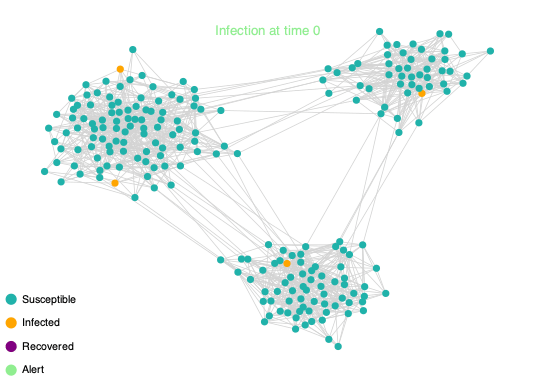

Graph saved

┌ Info: Saved animation to 
│   fn = /Users/julienblanchon/Git/julien-blanchon/Le-TP-de-Keunotor4/graphes/projet/ProjetTheorieDesGraphes/SAIR_model.gif
└ @ Plots /Users/julienblanchon/.julia/packages/Plots/UeTBV/src/animation.jl:114


In [43]:
# Test on N7_2A
N = nv(n7_2A) # number of vertices
SAIR(n7_2A, init_infection(n7_2A, 4), 0.2, 0.2, 0.3, 0.8, 30)
print("Graph saved")
showgif("SAIR_model.gif")


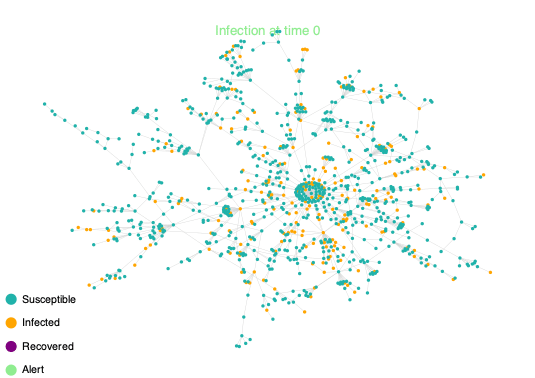

Graph saved

┌ Info: Saved animation to 
│   fn = /Users/julienblanchon/Git/julien-blanchon/Le-TP-de-Keunotor4/graphes/projet/ProjetTheorieDesGraphes/SAIR_model.gif
└ @ Plots /Users/julienblanchon/.julia/packages/Plots/UeTBV/src/animation.jl:114


In [44]:
# Test on Toulouse_neigh"
N = nv(toulouse_neigh) # number of vertices
SAIR(toulouse_neigh, init_infection(toulouse_neigh, nv(toulouse_neigh)/4), 0.2, 0.2, 0.3, 0.8, 30)
print("Graph saved")
showgif("SAIR_model.gif")

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 17 (code):</strong> Implement the <code>function Simulation_SAIR</code> (respect the header and the specifications).
    
<span style="font-size:0.9em">The corrector should be able to write <code>predictions, taus = Simulation_SAIR(net,nbinf,betas0,betas1,alphas,kappas,t,nbsimu)</code> with your code.</span>

In [45]:
function SAIR_simu(net, nbinf, beta0, beta1, alpha, kappa, t)
    out = zeros(Float64, (t+1,3))
    
    # initial state
    state = init_infection(net, nbinf)
    N = length(state)
    out[1,:] = [(nbinf)/N, 0, (N - nbinf)/N]

    # apply step by step and compute number of infected, recovered and susceptible
    for step in 1:t
        state = SAIR_step(net, state, beta0, beta1, alpha, kappa) # apply one step #SIS(net, state, beta, alpha, 1)
        out[step+1,:] = [count(x->x==1, state),count(x->x==2, state),count(x->x==0, state)]/N
    end

    return out
end

SAIR_simu (generic function with 1 method)

In [46]:
function Simulation_SAIR(net,nbinf,betas0,betas1,alphas,kappas,t,nbsimu)
    """Take a contact network, different diseases (defined by 
    different parameters alpha and beta), a number of initial
    infected people and process nbsimu simulations of SAIR over
    t time steps. You will provide the prediction of the 
    percentage of infected at each time t as well as the 
    spreading rate of each disease.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       nbinf (Int32): number of infected at the start of each 
            simulation
       betas0 (Array{Float64,1}): array of infection rate when not alert on edges
       betas1 (Array{Float64,1}): array of infection rate when alert on edges
       alphas (Array{Float64,1}): array of curing rate on vertices
       kappas (Array{Float64,1}): array of alerting rate on edges
       t (Int32): number of time step
       nbsimu (Int32): number of simulations
    
    RETURNS
        (Array{Float64,3}): the prediction of the percentage of 
            infected, the percentage of susceptible and the 
            percentage of recovered at each time step and for each 
            disease. The first dimension contains the time steps,
            the second contains the diseases, and the third the status
            (Infected: [:,:,1], Recovered: [:,:,2], Susceptible: [:,:,3])
        (Array{Float64,1}): effective spreading rate for each 
            disease
    """
    N = length(betas0)
    predictions = zeros(Float64, (t+1,N,3))
    
    for i in 1:N
        # parameters
        beta0, beta1, alpha, kappa = betas0[i], betas1[i], alphas[i], kappas[i]
        
        # simulate nbsimu times
        pred = zeros(Float64, (t+1,3))
        for sim in 1:nbsimu
            pred += SAIR_simu(net, nbinf, beta0, beta1, alpha, kappa, t)
        end

        # compute mean of all simulations
        pred = pred/nbsimu
        predictions[:,i,:] = pred

    end
    return predictions, betas0./alphas
end

Simulation_SAIR (generic function with 1 method)

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 18 (written):</strong> Run the script below comparing the number of infected of SAIR and SIR and comment what you see.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer:</strong></div>

In the SAIR model, we added an Alert state variable. There are three paths possible: 

- Susceptible $\rightarrow$ Infected ($\beta_0$) $\rightarrow$ Recovered
- Susceptible $\rightarrow$ Alert $\rightarrow$ Infected ($\beta_1 < \beta_0$) $\rightarrow$ Recovered (Alert when Susceptible surrounded by Infected)
- Susceptible $\rightarrow$ Alert $\rightarrow$ Susceptible (when Alert is not surrounded anymore by Infected)

Therefore, as the number of Infected people increases, the number of Alert people increases as well. However, since the infection rate is lower for Alert people, the infection peak will be lower than the SIR modela s shown in the following graph.

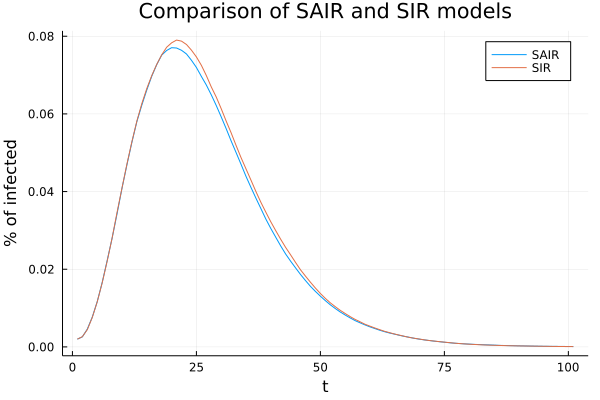

In [47]:
# Script launching prediction on one disease on toulouse_neigh and plotting the percentage
# of infected at each time step for SIR and SAIR.
predictions1, taus1 = Simulation_SAIR(toulouse_neigh,2,[0.2],[0.1],[0.1],[0.4],100,1000)
predictions2, taus2 = Simulation_SIR(toulouse_neigh,2,[0.2],[0.1],100,1000)

Plots.plot([predictions1[:,:,1] predictions2[:,:,1]],
           label=["SAIR" "SIR"],xlabel="t",ylabel="% of infected", title="Comparison of SAIR and SIR models")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 19 (written):</strong> Of course the presented SIS, SIR, and SAIR models are limitated in their modelization of the reality. Formulate few of these limitations (at least 2). 
Propose few algorithm addons/ideas (at least 2) which would make the models more complex and more accurate in regards to the reality.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer:</strong></div>

Limitations:
- In the reality, Recovered people can still get the disease
- In these models, we suppose that every single day (or time step) the same people are connected to each other
- The simulation could take too long for very large graph, it may be better to approximate the simulation. Or to use a [continuous version of the SIR algorithm](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIS_model)

Ideas:
- Randomize edges each time step
- Add age group in the population with different infection rate and curing rate
- Add a path Susceptible -> Vaccinated (Vaccinated can still get Infected but with lower $\beta$) and make Infected $\leftrightarrow$ Recovered
- Add lockdown when infections peaks are detected (eg.: making an algorithm that returns a boolean when the gradient is above a threshold)

<div style="width:75%;margin:0 auto;">

## Part 3 - Discover patient zero
    
<p style="text-align:justify;"> In the two previous parts you may have realised that understanding and controlling the spread of epidemics on contact networks is an important task. However, information about
the origin of the epidemic could be also extremely useful to reduce or prevent future outbreaks. Thus, in this part we will focus on algorithm solutions to answer this issue.</p>
    
<p style="text-align:justify;"> The stochastic nature of infection propagation makes the estimation of the epidemic origin intrinsically hard: indeed, different initial conditions can lead to the same configuration at the observation time. Methods such as the distance centrality or the Jordan center try to approximate it. They both rely on spatial information by stating that the first infected is probably at the center of the cluster of infection. Mathematically:
    
* The jordan center is expressed as $\min_{v\in \mathcal{I}}\max_{n\in \mathcal{I}}d(v,n)$ where $\mathcal{I}$ is a connected component of the original contact network containing all infected and recovered vertices, and where $d(\cdot,\cdot)$ is the distance (= the shortest path) between 2 vertices (if not weighted graph each edge accounts for 1 unit). 
* The distance centrality is expressed as $\min_{v\in \mathcal{I}}\sum_{n\in \mathcal{I}}d(v,n)(\delta_{n,I} + \delta_{n,R}/\alpha)$, where $\delta_{n,I}=1$ if the vertex n is infected ($=0$ otherwise), and where $\delta_{n,R}=1$ if the vertex n is recovered ($=0$ otherwise). You may note that in distance centrality we increase the weight of the recovered vertices by a factor $1/\alpha$, it translates the fact that recovered vertices tend to be closer to the origin of the epidemic since they probably got ill before.
    
    
We formulate the problem as follow: given a contact network and a snapshot of epidemic spread at a certain time, determine the infection source. A snapshot is a given <code>state</code> array for a contact network.</p>

<br>
    
<p style="font-size:0.9em"> A. Y. Lokhov, M. Mézard, H. Ohta, and L. Zdeborová, <cite>"Inferring the origin of an epidemic with a dynamic message-passing algorithm"</cite>, Physical Review (2014)</p>

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 20 (code):</strong> Implement the <code>function jordan</code> (respect the header and the specifications). You will need to use the function <code>dijkstra_shortest_paths</code> of the LighGraphs library, refer to the doc for more information. If there are multiple minimal vertices, then return the first one.
    
<span style="font-size:0.9em">The corrector should be able to write <code>zero = jordan(g,state,alpha)</code> with your code.</span>

In [48]:
function jordan(g,state)
    """Find patient zero by mean of the jordan center method.
    
    PARAMS
        g (LightGraph): graph representing the contact network
        state (Array{Int32,1}): disease status of each vertex
    
    RETURNS
        (Int32): the patient zero vertex number 
    """
    # TODO
    
    N = length(state)
    out = zeros(Int32, N)

    # all indices of Infected/Recovered
    index_inf_rec = findall(x->x==1 || x==2, state)

    # loop through all vertices
    for i in 1:N
        # not Susceptible
        if state[i] != 0
            # compute all distances, keep indices of Infected/Recovered
            out[i] = maximum(dijkstra_shortest_paths(g,i).dists[index_inf_rec])    
        else
            # if Susceptible => arbitrary maximum distance
            out[i] = 10000
        end
        
    end
    
    return argmin(out)
end

jordan (generic function with 1 method)

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 21 (code):</strong> Implement the <code>function distance</code> (respect the header and the specifications). You will need to use the function <code>dijkstra_shortest_paths</code> of the LighGraphs library, refer to the doc for more information. If there are multiple minimal vertices, then return the first one.
    
<span style="font-size:0.9em">The corrector should be able to write <code>zero = distance(g,state,alpha)</code> with your code.</span>

In [49]:
function distance(g,state,alpha=1.)
    """Find patient zero by mean of the distance centrality method.
    
    PARAMS
        g (LightGraph): graph representing the contact network
        state (Array{Int32,1}): disease status of each vertex
        alpha (Float64): curing rate
    
    RETURNS
        (Int32): the patient zero vertex number 
    """
    # TODO

    N = length(state)
    
    index_inf_rec = findall(x->x==1 || x==2, state)
    out = zeros(Float64, N)

    # loop through all vertices
    for i in 1:N
        v = state[i]
        # not Susceptible
        if v != 0
            sum = 0
            delta_i = 0
            delta_r = 0
            
            # compute all distances, keep all
            dist = dijkstra_shortest_paths(g,i).dists
            
            # loop through Infected and Recovered
            for j in index_inf_rec
                # Infected
                if state[j] == 1
                    delta_i = 1
                    delta_r = 0
                else 
                    # Recovered
                    delta_i = 0
                    delta_r = 1
                end

                sum += dist[j]*(delta_i + delta_r*alpha)

            end
            out[i] = sum
        else
            # if Susceptible => arbitrary large number
            out[i] = 10000
        end
    end

    return argmin(out)
end

distance (generic function with 2 methods)

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 22 (written):</strong> Run the 3 following scripts using your functions <code>jordan</code> and <code>distance</code> and comment on the results.
    
The contact network is karat7 for 2 different patient zero and a $50\times 50$ grid. The real patient zero ("Z"), your jordan ("J") and distance ("D") approximations are appearing in <code>colorant"lightblue"</code>.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong> Answer:</strong></div>

*Disclaimer: if the two last cells of the notebook have been executed, the two gifs are located inside "images" folder. For readibility, all cells below are collapsed (or should be collapsed)*

The center of the graph is the set of points where the greatest distance to other vertices is minimal.

Here, both methods only take into account, when computing the distance, Infected and Recovered vertices. Therefore, they will be situated at their center (they do not take into account Susceptible).

In the first graph, patient zero is located "relatively" in the center of Infected/Recovered

In the second graph, patient zero is eccentric. Visually, if we link all the Infected/Recovered with an ellipsis, we notice that both "C" and "J" are located in the center of the ellipsis while "Z" is close to its border. Both methods fail.

In the third graph, we can apply the same reasoning by drawing a circle around the border Infected/Susceptible. We notice: 
- The three points are close to the center

As a consequence:
- "C" is two steps from "Z"
- "J" four steps away

Considering there are 2500 vertices, the error is negligeable. 

Finally, the gif CORNER.gif represents the state of the model at each time step. The white dots represent the Jordan center and distance centrality methods. The red dot represents patient zero.

Here, the center is located in a corner, same as the second graph below. Therefore, we expect the approximation of the center to be wrong. Indeed, in the beginning, the white dots are close to the actual center as there are not enough Infected/Recovered that introduce "error". However, as the disease advances, the error becomes larger.

In the gif CENTER.gif, patient zero is located at, more or less, the center of the graph. The approximations, even in advanced stages of the disease are pretty good.

┌ Warning: type LightGraphs.SimpleGraphs.SimpleGraph{Int64} does not exist in workspace; reconstructing
└ @ JLD2 /Users/julienblanchon/.julia/packages/JLD2/k9Gt0/src/data/reconstructing_datatypes.jl:461


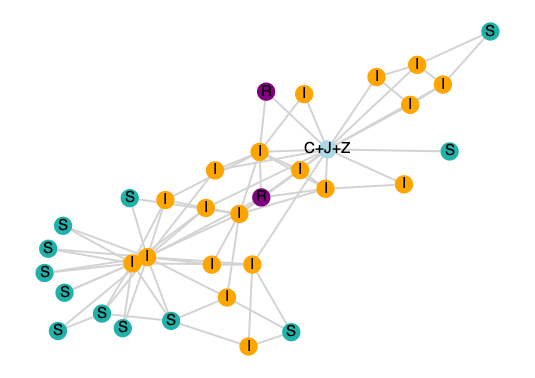

In [50]:
# Loading a snapshot of karat7
@load "karat7_Q22_1.jld2" g state pat_zero alpha beta loc_x loc_y

g = karat7
# Run the patient zero finding function
cent_pat_zero = distance(g,state,alpha)
jor_pat_zero = jordan(g,state)

# Some display options 
labels = Array{String, 1}(undef,nv(g))
for k=1:nv(g)
    if state[k]==1
        labels[k]="I"
    elseif state[k]==2
        labels[k]="R"
    else
        labels[k]="S"
    end
end

if cent_pat_zero==jor_pat_zero==pat_zero
    labels[cent_pat_zero]="C+J+Z"
elseif cent_pat_zero==jor_pat_zero
    labels[cent_pat_zero]="C+J"
    labels[pat_zero]="Z"
elseif cent_pat_zero==pat_zero
    labels[cent_pat_zero]="C+Z"
    labels[jor_pat_zero]="J"
elseif jor_pat_zero==pat_zero
    labels[jor_pat_zero]="J+Z"
    labels[cent_pat_zero]="C"
else
    labels[cent_pat_zero]="C"
    labels[jor_pat_zero]="J"
    labels[pat_zero]="Z"
end

nodecolor = [colorant"lightseagreen", colorant"orange", colorant"purple"]
colors = nodecolor[state + ones(Int32,nv(g))]
colors[pat_zero] = colorant"lightblue"
colors[cent_pat_zero] = colorant"lightblue"
colors[jor_pat_zero] = colorant"lightblue"

# Display
draw(PNG("karat7_Q22_1.png", 20cm, 20cm), gplot(g,loc_x,loc_y,nodefillc=colors,nodelabel=labels))

gplot(g,loc_x,loc_y,nodefillc=colors,nodelabel=labels)

┌ Warning: type LightGraphs.SimpleGraphs.SimpleGraph{Int64} does not exist in workspace; reconstructing
└ @ JLD2 /Users/julienblanchon/.julia/packages/JLD2/k9Gt0/src/data/reconstructing_datatypes.jl:461


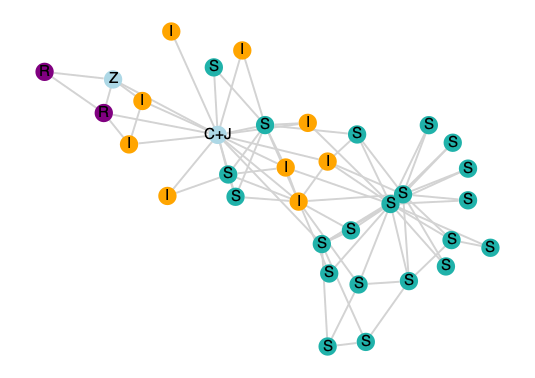

In [51]:
# Loading a snapshot of karat7
@load "karat7_Q22_2.jld2" g state pat_zero alpha beta loc_x loc_y
g = karat7

# Run the patient zero finding function
cent_pat_zero = distance(g,state,alpha)
jor_pat_zero = jordan(g,state)

# Some display options 
labels = Array{String, 1}(undef,nv(karat7))
for k=1:nv(karat7)
    if state[k]==1
        labels[k]="I"
    elseif state[k]==2
        labels[k]="R"
    else
        labels[k]="S"
    end
end

if cent_pat_zero==jor_pat_zero==pat_zero
    labels[cent_pat_zero]="C+J+Z"
elseif cent_pat_zero==jor_pat_zero
    labels[cent_pat_zero]="C+J"
    labels[pat_zero]="Z"
elseif cent_pat_zero==pat_zero
    labels[cent_pat_zero]="C+Z"
    labels[jor_pat_zero]="J"
elseif jor_pat_zero==pat_zero
    labels[jor_pat_zero]="J+Z"
    labels[cent_pat_zero]="C"
else
    labels[cent_pat_zero]="C"
    labels[jor_pat_zero]="J"
    labels[pat_zero]="Z"
end

nodecolor = [colorant"lightseagreen", colorant"orange", colorant"purple"]
colors = nodecolor[state + ones(Int32,nv(karat7))]
colors[pat_zero] = colorant"lightblue"
colors[cent_pat_zero] = colorant"lightblue"
colors[jor_pat_zero] = colorant"lightblue"

# Display
draw(PNG("karat7_Q22_2.png", 20cm, 20cm), gplot(karat7,loc_x,loc_y,nodefillc=colors,nodelabel=labels))

gplot(g,loc_x,loc_y,nodefillc=colors,nodelabel=labels)

┌ Warning: type LightGraphs.SimpleGraphs.SimpleGraph{Int64} does not exist in workspace; reconstructing
└ @ JLD2 /Users/julienblanchon/.julia/packages/JLD2/k9Gt0/src/data/reconstructing_datatypes.jl:461


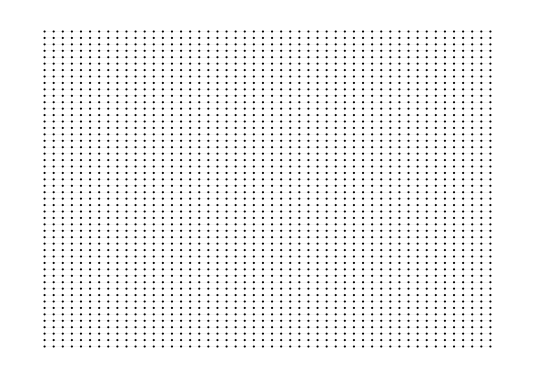

In [55]:
# Loading a snapshot of grid50
@load "grid50_Q22.jld2" g state pat_zero alpha beta loc_x loc_y

g = Graphs.grid([50, 50])

# Run the patient zero finding function
cent_pat_zero = distance(g,state,alpha)
jor_pat_zero = jordan(g,state) 

# Some display options 
labels = Array{String, 1}(undef,length(state))
for k=1:length(state)
    if state[k]==1
        labels[k]="I"
    elseif state[k]==2
        labels[k]="R"
    else
        labels[k]="S"
    end
end

if cent_pat_zero==jor_pat_zero==pat_zero
    labels[cent_pat_zero]="C+J+Z"
elseif cent_pat_zero==jor_pat_zero
    labels[cent_pat_zero]="C+J"
    labels[pat_zero]="Z"
elseif cent_pat_zero==pat_zero
    labels[cent_pat_zero]="C+Z"
    labels[jor_pat_zero]="J"
elseif jor_pat_zero==pat_zero
    labels[jor_pat_zero]="J+Z"
    labels[cent_pat_zero]="C"
else
    labels[cent_pat_zero]="C"
    labels[jor_pat_zero]="J"
    labels[pat_zero]="Z"
end

nodecolor = [colorant"lightseagreen", colorant"orange", colorant"purple"]
colors = nodecolor[state + ones(Int32,length(state))]
colors[pat_zero] = colorant"lightblue"
colors[cent_pat_zero] = colorant"lightblue"
colors[jor_pat_zero] = colorant"lightblue"

# Display
draw(PNG("grid50_Q22.png", 100cm, 100cm), gplot(g,loc_x,loc_y,nodefillc=colors,nodelabel=labels))


gplot(g,loc_x,loc_y,nodefillc=colors)

In [ ]:
function SIR_2(net,state,beta,alpha,t, pat_zero, loc_x, loc_y, name)
    """Take a contact network at a certain state and apply t time steps
    of an SIR model.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       beta (Float64): infection rate
       alpha (Float64): curing rate
       t (Int32): number of time step
    
    RETURNS
        (Array{Int32,1}): The new state of the contact network after t time steps.
    """
    # TODO

    anim=Animation()
    old_state = copy(state)

    for step in 1:t
        old_state = SIR_step(net, old_state, beta, alpha)
        jor_pat_zero = jordan(net,old_state)
        cent_pat_zero = distance(net,old_state,alpha)
        anim = animate_graph_2(anim, net, old_state, step, loc_x, loc_y, jor_pat_zero, cent_pat_zero, pat_zero)
        
    end
    gif(anim, "$(name).gif", fps = 2)
    return old_state
end

function animate_graph_2(anim, net, state, step, loc_x, loc_y, jor_pat_zero, cent_pat_zero, pat_zero)
    """Creates png of each state and create a gif representing how infections 
    vary at each t time.
    
    PARAMS
       anim (Plots): Plots object 
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       locs_x (Array{Float64,1}): x location of each vertex
       locs_y (Array{Float64,1}): y location of each vertex
    
    RETURNS
        updated anim object
    """ 
    # create gif

    labels = Array{String, 1}(undef,length(state))
    for k=1:length(state)
        if state[k]==1
            labels[k]="I"
        elseif state[k]==2
            labels[k]="R"
        else
            labels[k]="S"
        end
    end

    

    nodecolor = [colorant"lightseagreen", colorant"orange", colorant"purple"]
    colors = nodecolor[state + ones(Int32,length(state))]
    
    colors[cent_pat_zero] = colorant"lightblue"
    colors[jor_pat_zero] = colorant"lightblue"
    colors[pat_zero] = colorant"red"

    p = gplot(net, loc_x, loc_y, nodefillc=colors)
    output = compose(p,
                (context(), rectangle(), fill("black")))

    tmpfilename=joinpath(anim.dir,@sprintf("%06d.png",step))
    Compose.draw(PNG(tmpfilename),output)
    push!(anim.frames, tmpfilename)

    return anim
end

In [ ]:
N = nv(g) # number of vertices
state_0 = init_infection(g, 1)

SIR_2(g, state_0, beta, alpha, 100, argmax(state_0), loc_x, loc_y, "CORNER")
print("Graph saved")

In [ ]:
N = nv(g) # number of vertices
state_0 = init_infection(g, 1)

SIR_2(g, state_0, beta, alpha, 100, argmax(state_0), loc_x, loc_y, "CENTER")
print("Graph saved")